In [ ]:
#Mounting Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Unzip content of the file
!unzip /content/drive/MyDrive/PR/news.zip

Archive:  /content/drive/MyDrive/PR/news.zip
  inflating: news.csv                


In [ ]:
#Importing necessary libraRIES
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#Read the data
df=pd.read_csv('/content/news.csv')
#Get shape and head
print(df.shape)
df.head()

(6335, 4)


,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [ ]:
df.isnull().sum()

Unnamed: 0    0
title         0
text          0
label         0
dtype: int64

In [ ]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
X.head()

,Unnamed: 0,title,text
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello..."
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T..."
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...


In [ ]:
y.head()

0    FAKE
1    FAKE
2    REAL
3    FAKE
4    REAL
Name: label, dtype: object

In [ ]:
from sklearn.model_selection import train_test_split
# Split the dataset
labels = df.label
x_train,x_test,y_train,y_test=train_test_split(df['text'], labels, test_size=0.2, random_state=7)
print(x_train.head)

<bound method NDFrame.head of 6237    The head of a leading survivalist group has ma...
3722    ‹ › Arnaldo Rodgers is a trained and educated ...
5774    Patty Sanchez, 51, used to eat 13,000 calories...
336     But Benjamin Netanyahu’s reelection was regard...
3622    John Kasich was killing it with these Iowa vot...
                              ...                        
5699                                                     
2550    It’s not that Americans won’t elect wealthy pr...
537     Anyone writing sentences like ‘nevertheless fu...
1220    More Catholics are in Congress than ever befor...
4271    It was hosted by CNN, and the presentation was...
Name: text, Length: 5068, dtype: object>


In [ ]:
print(y_train.head)

<bound method NDFrame.head of 6237    FAKE
3722    FAKE
5774    FAKE
336     REAL
3622    REAL
        ... 
5699    FAKE
2550    REAL
537     REAL
1220    REAL
4271    REAL
Name: label, Length: 5068, dtype: object>


In [ ]:
print(x_test.head)

<bound method NDFrame.head of 3534    A day after the candidates squared off in a fi...
6265    VIDEO : FBI SOURCES SAY INDICTMENT LIKELY FOR ...
3123    It's debate season, where social media has bro...
3940    Mitch McConnell has decided to wager the Repub...
2856    Donald Trump, the actual Republican candidate ...
                              ...                        
4986    Washington (CNN) President Barack Obama announ...
5789    The revival of middle-class jobs has been one ...
4338    "I can guarantee that," Obama answered when as...
5924    Videos 30 Civilians Die In US Airstrike Called...
6030    The retired neurosurgeon lashed out Friday mor...
Name: text, Length: 1267, dtype: object>


In [ ]:
#Initialize a TfidfVectorizer to extract features from dataset

from sklearn.feature_extraction.text import TfidfVectorizer,TfidfTransformer

tfidf_vectorizer=TfidfVectorizer(stop_words='english', max_df=0.7)
#DataFlair - Fit and transform train set, transform test set
tfidf_xtrain=tfidf_vectorizer.fit_transform(x_train)
# tfidf_xtrain_Gaussian=tfidf_vectorizer.fit_transform(x_train.to_xarray())
# tfidf_ytrain=tfidf_vectorizer.fit_transform(y_train) 
tfidf_test=tfidf_vectorizer.transform(x_test)

print(tfidf_xtrain.shape)
print(tfidf_test.shape)
print(tfidf_test)

(5068, 61651)
(1267, 61651)
  (0, 60731)	0.05899712902382916
  (0, 60684)	0.033385466151529625
  (0, 60271)	0.04581143542258741
  (0, 60261)	0.07937859313949312
  (0, 59116)	0.10997273171965094
  (0, 59036)	0.08042180974421559
  (0, 58654)	0.07128159375531905
  (0, 58335)	0.0678398429566027
  (0, 57086)	0.12429244186413906
  (0, 55170)	0.20939665348422057
  (0, 54706)	0.035492943055135416
  (0, 54394)	0.10596727423829927
  (0, 54238)	0.06234899619642803
  (0, 53749)	0.04942070163765446
  (0, 53518)	0.117529167732626
  (0, 53144)	0.059982387365669215
  (0, 52555)	0.14065295472127948
  (0, 52483)	0.07360851972393109
  (0, 51960)	0.14065295472127948
  (0, 51955)	0.030414611451489323
  (0, 51663)	0.12057034351821985
  (0, 51527)	0.08134873077710283
  (0, 51159)	0.053278054236854326
  (0, 51005)	0.07360851972393109
  (0, 50068)	0.06481045119580665
  :	:
  (1266, 16835)	0.08080116269909657
  (1266, 16385)	0.0655727278454052
  (1266, 15999)	0.03279926109441314
  (1266, 14890)	0.05544599110567

In [ ]:
#Importing all the clasasifiers
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, PassiveAggressiveClassifier
from sklearn import svm

In [ ]:
#GridSearch for decision tree classifier with different number of trees
clf_dt = GridSearchCV(DecisionTreeClassifier(),{'max_depth':[1,2,3,4,5,6,7,8,9,10,20,25,30],'criterion':['gini','entropy']},cv = 4, return_train_score=False)
clf_dt.fit(tfidf_xtrain,y_train)

GridSearchCV(cv=4, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 25,
                                       30]})

In [ ]:
#This is the Accuracy Score for decisiojn trees for different number of depth. 
df = pd.DataFrame(clf_dt.cv_results_)
# print(df[['param_max_depth','param_criterion','mean_test_score']])
print(df[['param_max_depth','mean_test_score']])

   param_max_depth  mean_test_score
0                1         0.693173
1                2         0.749013
2                3         0.753157
3                4         0.784136
4                5         0.797356
5                6         0.806827
6                7         0.811365
7                8         0.815312
8                9         0.814720
9               10         0.821231
10              20         0.815509
11              25         0.809590
12              30         0.813733
13               1         0.693173
14               2         0.746448
15               3         0.751184
16               4         0.775059
17               5         0.792028
18               6         0.802486
19               7         0.808800
20               8         0.810773
21               9         0.808603
22              10         0.810971
23              20         0.818469
24              25         0.818074
25              30         0.812944


 #Reference:: https://stackoverflow.com/questions/43214978/seaborn-barplot-displaying-values

In [ ]:
#This is function is to display values on the graph
def show_values_on_bars(axs):
    def _show_on_single_plot(ax):        
        for p in ax.patches:
            _x = p.get_x() + p.get_width() / 2
            _y = p.get_y() + p.get_height()
            value = '{:.2f}'.format(p.get_height())
            ax.text(_x, _y, value, ha="center") 

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

Text(0, 0.5, 'Accuracy')

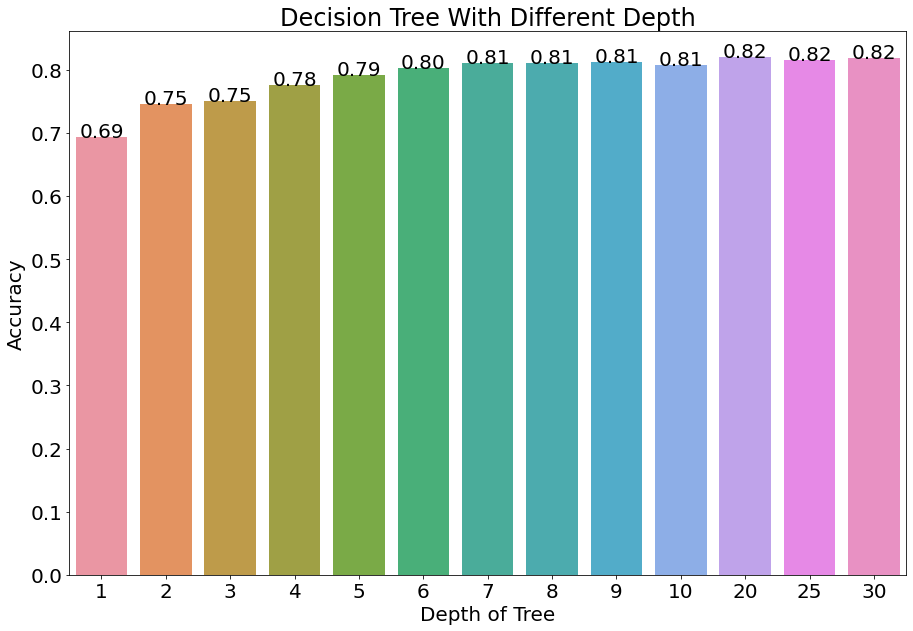

In [ ]:
#I have stored accuracy of decision tree classifier in the follwing list so that i dont have to run my code all the time. And following graph is for accuracy with respect to parameter "entropy".

accuracy_decision = [0.693,0.746,0.751,0.775,0.791,0.803,0.810,0.811,0.812,0.808,0.820,0.816,0.818]
plt.rcParams.update({'font.size': 20})

x_label = [1,2,3,4,5,6,7,8,9,10,20,25,30]

plt.figure(figsize = (15, 10))
ax=sns.barplot(x=x_label, y=accuracy_decision)
show_values_on_bars(ax)
plt.title('Decision Tree With Different Depth')
plt.xlabel('Depth of Tree')
plt.ylabel('Accuracy')


In [ ]:
#Here i am printing the best parameters from the trained model.
print(clf_dt.best_params_)

{'criterion': 'gini', 'max_depth': 10}


In [ ]:
#Now i am using this best parameter to train the model and we will find accuracy of that model on our test data. 
from sklearn.metrics import accuracy_score
param_grid = {
    'criterion':[clf_dt.best_params_['criterion']],
    'max_depth':[clf_dt.best_params_['max_depth']]
}
gridSearch_model_dt = GridSearchCV(estimator=DecisionTreeClassifier(),param_grid=param_grid,cv=5,n_jobs=-1)
gridSearch_model_dt.fit(tfidf_xtrain,y_train)
y_pred = gridSearch_model_dt.predict(tfidf_test)
print("Accuracy of decision tree classifier after finding best parameter is:",accuracy_score(y_test,y_pred))

Accuracy of decision tree classifier after finding best parameter is: 0.8003157063930545


In [ ]:
##Gridsearch for knn classifier with different number of k values
clf_knn = GridSearchCV(KNeighborsClassifier(),{
    'n_neighbors':[1,2,3,4,5,6,7,8,9,10,20,25]
},cv=4,return_train_score=False)
clf_knn.fit(tfidf_xtrain,y_train)


GridSearchCV(cv=4, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20,
                                         25]})

In [ ]:
#This is the accuracy for KNN for different number of neighbours
df = pd.DataFrame(clf_knn.cv_results_)
print(df[['param_n_neighbors','mean_test_score']])


   param_n_neighbors  mean_test_score
0                  1         0.637332
1                  2         0.583860
2                  3         0.583860
3                  4         0.555051
4                  5         0.555051
5                  6         0.542818
6                  7         0.542818
7                  8         0.531571
8                  9         0.531571
9                 10         0.527032
10                20         0.515193
11                25         0.513023


In [ ]:
#Now generating  KNN model withg the best parameters
param_grid = {
    'n_neighbors':[clf_knn.best_params_['n_neighbors']]
}
gridSearch_model_knn = GridSearchCV(estimator=KNeighborsClassifier(),param_grid=param_grid,cv=5,n_jobs=-1)
gridSearch_model_knn.fit(tfidf_xtrain,y_train)
y_pred = gridSearch_model_knn.predict(tfidf_test)
print("Accuracy of KNN classifier after finding best parameter is:",accuracy_score(y_test,y_pred))

Accuracy of KNN classifier after finding best parameter is: 0.6535122336227308


In [ ]:
#Gridsearch for random Forest classfierv for different number of parameters.
clf_rf = GridSearchCV(RandomForestClassifier(),{'n_estimators':[10,20,30,40,50,60,70,80],
                                                'max_depth':[10,20,30],
                                                'criterion':['entropy','gini']},
                      cv=4,return_train_score=False)
clf_rf.fit(tfidf_xtrain,y_train)


GridSearchCV(cv=4, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [10, 20, 30],
                         'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80]})

In [ ]:
#This is the accuracy for random forest classifier for different number of estimators
df = pd.DataFrame(clf_rf.cv_results_)
print(df[['param_n_estimators','param_max_depth','param_criterion','mean_test_score']])

   param_n_estimators param_max_depth param_criterion  mean_test_score
0                  10              10         entropy         0.790253
1                  20              10         entropy         0.819850
2                  30              10         entropy         0.818863
3                  40              10         entropy         0.841555
4                  50              10         entropy         0.835043
5                  60              10         entropy         0.836030
6                  70              10         entropy         0.839187
7                  80              10         entropy         0.849250
8                  10              20         entropy         0.826164
9                  20              20         entropy         0.850631
10                 30              20         entropy         0.855367
11                 40              20         entropy         0.851026
12                 50              20         entropy         0.858919
13    

Text(0, 0.5, 'Accuracy')

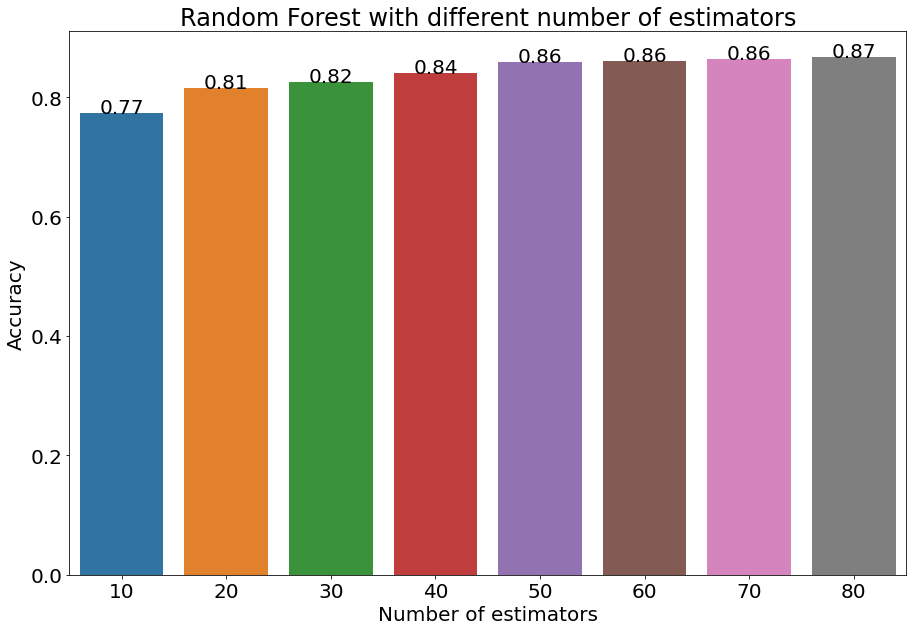

In [ ]:
#Here also i have stored accuracy for different parameters in list So that i dont have to train my model every time.
accuracy_random = [ 0.774,0.815,0.825,0.840,0.859,0.860,0.863,0.867]
plt.rcParams.update({'font.size': 20})

x_label = [10,20,30,40,50,60,70,80]

plt.figure(figsize = (15, 10))
ax=sns.barplot(x=x_label, y=accuracy_random)
show_values_on_bars(ax)
plt.title('Random Forest with different number of estimators')
plt.xlabel('Number of estimators')
plt.ylabel('Accuracy')


In [ ]:
print(clf_rf.best_params_)

{'criterion': 'gini', 'max_depth': 30, 'n_estimators': 70}


In [ ]:
#Now generating Random Forest model with the best number of parameters
param_grid = {
    'criterion':[clf_rf.best_params_['criterion']],
    'max_depth':[clf_rf.best_params_['max_depth']],
    'n_estimators':[clf_rf.best_params_['n_estimators']],
    #'max_features':[clf_rf.best_params_['max_features']]
}
gridSearch_model_rf = GridSearchCV(estimator=RandomForestClassifier(),param_grid=param_grid,cv=5,n_jobs=-1)
gridSearch_model_rf.fit(tfidf_xtrain,y_train)
y_pred = gridSearch_model_rf.predict(tfidf_test)
print("Accuracy of Random Forest classifier after finding best parameter is:",accuracy_score(y_test,y_pred))

Accuracy of Random Forest classifier after finding best parameter is: 0.8745067087608525


In [ ]:
##Gridsearch for logistic regression classifier with different number of iters
clf_logistic = GridSearchCV(LogisticRegression(),{
    'max_iter':[50,100,150,200,250,300,350,400],'n_jobs':[-1]
},cv=4,return_train_score=False)
print(clf_logistic.get_params().keys())
clf_logistic.fit(tfidf_xtrain,y_train)


dict_keys(['cv', 'error_score', 'estimator__C', 'estimator__class_weight', 'estimator__dual', 'estimator__fit_intercept', 'estimator__intercept_scaling', 'estimator__l1_ratio', 'estimator__max_iter', 'estimator__multi_class', 'estimator__n_jobs', 'estimator__penalty', 'estimator__random_state', 'estimator__solver', 'estimator__tol', 'estimator__verbose', 'estimator__warm_start', 'estimator', 'n_jobs', 'param_grid', 'pre_dispatch', 'refit', 'return_train_score', 'scoring', 'verbose'])


GridSearchCV(cv=4, estimator=LogisticRegression(),
             param_grid={'max_iter': [50, 100, 150, 200, 250, 300, 350, 400],
                         'n_jobs': [-1]})

In [ ]:
#This is the accuracy for Logistic Regression  classifier for different number of iters
df = pd.DataFrame(clf_logistic.cv_results_)
print(df[['param_max_iter','mean_test_score']])

  param_max_iter  mean_test_score
0             50         0.912391
1            100         0.912391
2            150         0.912391
3            200         0.912391
4            250         0.912391
5            300         0.912391
6            350         0.912391
7            400         0.912391


In [ ]:
print(clf_logistic.best_params_)

{'max_iter': 50, 'n_jobs': -1}


In [ ]:
#Generating logistic model with best parameter
param_grid = {
    'max_iter':[clf_logistic.best_params_['max_iter']]
}
gridsearch_model_logistic = GridSearchCV(LogisticRegression(),param_grid=param_grid)
gridsearch_model_logistic.fit(tfidf_xtrain,y_train)
y_pred = gridsearch_model_logistic.predict(tfidf_test)
print("Accuracy of Logistic Regression classifier after finding best parameter is:",accuracy_score(y_test,y_pred))

Accuracy of Logistic Regression classifier after finding best parameter is: 0.9171270718232044


In [ ]:
#GridSearch for svm classifier with different number of gamma values, kernel values and penalty values
clf_svc = GridSearchCV(svm.SVC(),{'kernel':['linear','rbf'], 'C' : [1, 10, 100, 1000],'gamma':[1,0.1,0.01,0.001]}, return_train_score=False)
clf_svc.fit(tfidf_xtrain,y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['linear', 'rbf']})

In [ ]:
#This is the Accuracy Score for svm  for different number of penalty factor. 
df = pd.DataFrame(clf_svc.cv_results_)
print(df[['param_kernel','param_C','param_gamma','mean_test_score']])
# print(df[['mean_test_score']])

   param_kernel param_C param_gamma  mean_test_score
0        linear       1           1         0.934885
1           rbf       1           1         0.924624
2        linear       1         0.1         0.934885
3           rbf       1         0.1         0.892069
4        linear       1        0.01         0.934885
5           rbf       1        0.01         0.715475
6        linear       1       0.001         0.934885
7           rbf       1       0.001         0.501578
8        linear      10           1         0.927978
9           rbf      10           1         0.930741
10       linear      10         0.1         0.927978
11          rbf      10         0.1         0.939225
12       linear      10        0.01         0.927978
13          rbf      10        0.01         0.896608
14       linear      10       0.001         0.927978
15          rbf      10       0.001         0.717054
16       linear     100           1         0.927978
17          rbf     100           1         0.

Text(0, 0.5, 'Accuracy')

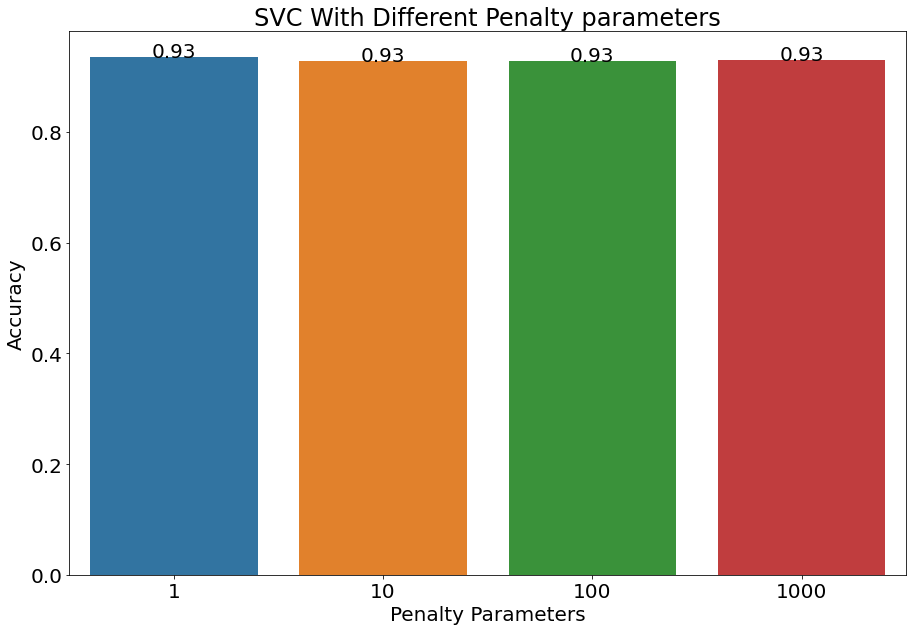

In [ ]:
#have stored accuracy of SVC in the follwing list so that we dont have to run my code all the time. And following graph is for accuracy with respect to parameter "penalty".

accuracy_decision = [0.9348,0.9279,0.9279,0.9297]
plt.rcParams.update({'font.size': 20})

x_label = [1,10,100,1000]

plt.figure(figsize = (15, 10))
ax=sns.barplot(x=x_label, y=accuracy_decision)
show_values_on_bars(ax)
plt.title('SVC With Different Penalty parameters')
plt.xlabel('Penalty Parameters')
plt.ylabel('Accuracy')

In [ ]:
#GridSearch for passive aggressive classifier with different number of trees
clf_pa = GridSearchCV(PassiveAggressiveClassifier(),{'C':[0.5,1,10,100,1000]},cv = 4, return_train_score=False)
clf_pa.fit(tfidf_xtrain,y_train)

GridSearchCV(cv=4, estimator=PassiveAggressiveClassifier(),
             param_grid={'C': [0.5, 1, 10, 100, 1000]})

In [ ]:
#This is the Accuracy Score for svm  for different number of penalty factor. 
df = pd.DataFrame(clf_pa.cv_results_)
print(df[['mean_test_score']])
# print(df[['mean_test_score']])

   mean_test_score
0         0.934688
1         0.938043
2         0.936267
3         0.937648
4         0.935675


Text(0, 0.5, 'Accuracy')

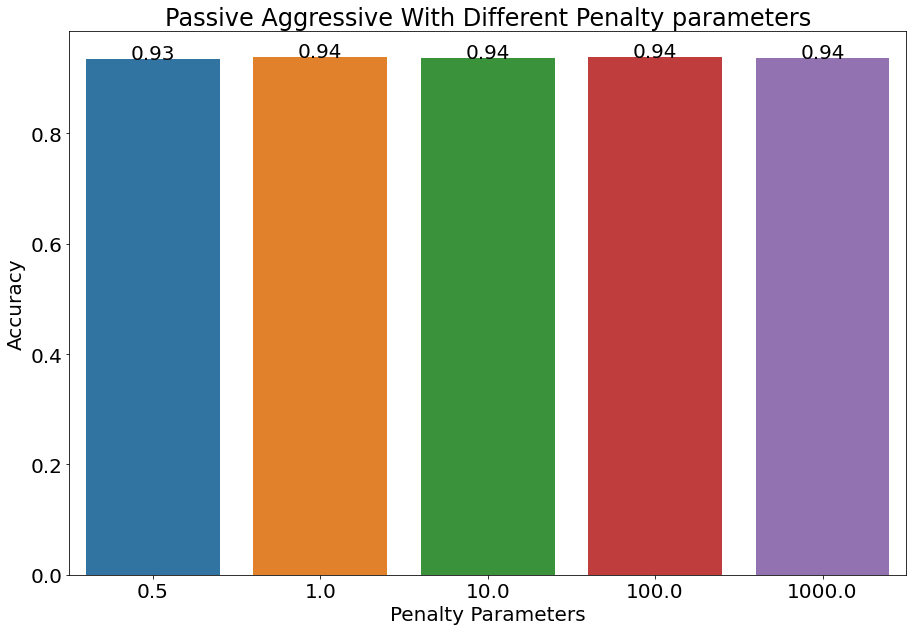

In [ ]:
#have stored accuracy of passive aggressive in the follwing list so that we dont have to run my code all the time. And following graph is for accuracy with respect to parameter "penalty".

accuracy_decision = [0.9346,0.9380,0.9362,0.9376, 0.9356]
plt.rcParams.update({'font.size': 20})

x_label = [0.5,1,10,100,1000]

plt.figure(figsize = (15, 10))
ax=sns.barplot(x=x_label, y=accuracy_decision)
show_values_on_bars(ax)
plt.title('Passive Aggressive With Different Penalty parameters')
plt.xlabel('Penalty Parameters')
plt.ylabel('Accuracy')